# Bronze Layer Data Exploration

This notebook explores the bronze layer outputs from the data ingestion pipeline.

**Bronze Layer Location:** `data/02_intermediate/`

**Contents:**
- Granule metadata partitioned by region
- Consolidated granules table
- Data quality manifest
- Ingestion metadata
- Metrics preparation tables

In [1]:
# Import required libraries
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Load Bronze Granules (Partitioned by Region)

In [2]:
# Define paths
granules_dir = Path('../data/02_intermediate/granules')

# Load all region granules
granules_dict = {}
for parquet_file in granules_dir.glob('*.parquet'):
    region_id = parquet_file.stem
    df = pd.read_parquet(parquet_file)
    granules_dict[region_id] = df
    print(f"✓ Loaded {region_id}: {len(df)} granules")

print(f"\n✓ Total regions loaded: {len(granules_dict)}")

✓ Loaded NYC001: 50 granules
✓ Loaded LAX001: 50 granules
✓ Loaded MIA001: 50 granules
✓ Loaded CHI001: 50 granules

✓ Total regions loaded: 4


In [3]:
# Display NYC001 granules (sample region)
print("=" * 80)
print("NYC001 Granules Sample")
print("=" * 80)
nyc_granules = granules_dict.get('NYC001', pd.DataFrame())

if not nyc_granules.empty:
    print(f"\nShape: {nyc_granules.shape}")
    print(f"\nColumns: {list(nyc_granules.columns)}")
    print(f"\nData Types:")
    print(nyc_granules.dtypes)
else:
    print("No data found for NYC001")

NYC001 Granules Sample

Shape: (50, 14)

Columns: ['region_id', 'granule_id', 'title', 'time_start', 'time_end', 'cloud_cover', 'product', 'bbox_west', 'bbox_south', 'bbox_east', 'bbox_north', 'ingestion_timestamp', 'links', 'date']

Data Types:
region_id               object
granule_id              object
title                   object
time_start              object
time_end                object
cloud_cover              int64
product                 object
bbox_west              float64
bbox_south             float64
bbox_east              float64
bbox_north             float64
ingestion_timestamp     object
links                   object
date                    object
dtype: object


In [4]:
# Display first 5 records
if not nyc_granules.empty:
    print("First 5 NYC001 records:")
    display(nyc_granules.head())

First 5 NYC001 records:


,region_id,granule_id,title,time_start,time_end,cloud_cover,product,bbox_west,bbox_south,bbox_east,bbox_north,ingestion_timestamp,links,date
0,NYC001,G3623541276-LPCLOUD,MOD11A1.A2025205.h12v04.061.2025206092246,2025-07-24T00:00:00.000Z,2025-07-24T23:59:59.000Z,0,MOD11A1,-74.2589,40.4774,-73.7004,40.9176,2025-10-30T15:52:53.206802,[],2025-07-24
1,NYC001,G3625212929-LPCLOUD,MOD11A1.A2025206.h12v04.061.2025207093454,2025-07-25T00:00:00.000Z,2025-07-25T23:59:59.000Z,0,MOD11A1,-74.2589,40.4774,-73.7004,40.9176,2025-10-30T15:52:53.206814,[],2025-07-25
2,NYC001,G3627591719-LPCLOUD,MOD11A1.A2025207.h12v04.061.2025209021044,2025-07-26T00:00:00.000Z,2025-07-26T23:59:59.000Z,0,MOD11A1,-74.2589,40.4774,-73.7004,40.9176,2025-10-30T15:52:53.206816,[],2025-07-26
3,NYC001,G3628568109-LPCLOUD,MOD11A1.A2025208.h12v04.061.2025209165558,2025-07-27T00:00:00.000Z,2025-07-27T23:59:59.000Z,0,MOD11A1,-74.2589,40.4774,-73.7004,40.9176,2025-10-30T15:52:53.206818,[],2025-07-27
4,NYC001,G3630043425-LPCLOUD,MOD11A1.A2025209.h12v04.061.2025210185302,2025-07-28T00:00:00.000Z,2025-07-28T23:59:59.000Z,0,MOD11A1,-74.2589,40.4774,-73.7004,40.9176,2025-10-30T15:52:53.206819,[],2025-07-28


In [5]:
# Summary statistics for NYC001
if not nyc_granules.empty:
    print("=" * 80)
    print("NYC001 Granules - Summary Statistics")
    print("=" * 80)
    print(f"\nDate Range: {nyc_granules['date'].min()} to {nyc_granules['date'].max()}")
    print(f"Unique Dates: {nyc_granules['date'].nunique()}")
    print(f"Product: {nyc_granules['product'].iloc[0]}")

NYC001 Granules - Summary Statistics

Date Range: 2025-07-24 to 2025-09-11
Unique Dates: 50
Product: MOD11A1


In [6]:
# Cloud cover statistics
if not nyc_granules.empty:
    print("Cloud Cover Statistics:")
    print(nyc_granules['cloud_cover'].describe())

Cloud Cover Statistics:
count    50.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: cloud_cover, dtype: float64


In [7]:
# Bounding box information
if not nyc_granules.empty:
    print("NYC001 Bounding Box:")
    print(f"  West:  {nyc_granules['bbox_west'].iloc[0]}")
    print(f"  South: {nyc_granules['bbox_south'].iloc[0]}")
    print(f"  East:  {nyc_granules['bbox_east'].iloc[0]}")
    print(f"  North: {nyc_granules['bbox_north'].iloc[0]}")

NYC001 Bounding Box:
  West:  -74.2589
  South: 40.4774
  East:  -73.7004
  North: 40.9176


## 2. All Regions Overview

In [8]:
# Create summary table for all regions
region_summary = []

for region_id, df in granules_dict.items():
    summary = {
        'Region': region_id,
        'Granule Count': len(df),
        'Date Start': df['date'].min(),
        'Date End': df['date'].max(),
        'Unique Dates': df['date'].nunique(),
        'Avg Cloud Cover': f"{df['cloud_cover'].mean():.2f}%",
        'Product': df['product'].iloc[0] if 'product' in df.columns else 'N/A',
    }
    region_summary.append(summary)

summary_df = pd.DataFrame(region_summary)

print("=" * 80)
print("All Regions Summary")
print("=" * 80)
display(summary_df)

All Regions Summary


,Region,Granule Count,Date Start,Date End,Unique Dates,Avg Cloud Cover,Product
0,NYC001,50,2025-07-24,2025-09-11,50,0.00%,MOD11A1
1,LAX001,50,2025-07-24,2025-09-11,50,0.00%,MOD11A1
2,MIA001,50,2025-07-24,2025-09-11,50,0.00%,MOD11A1
3,CHI001,50,2025-07-24,2025-09-11,50,0.00%,MOD11A1


## 3. Load Bronze Metadata

In [9]:
# Load metadata (get latest version)
metadata_dir = Path('../data/02_intermediate/metadata.parquet')

# Find latest version
metadata_versions = sorted(metadata_dir.glob('*/metadata.parquet'))
if metadata_versions:
    latest_metadata = metadata_versions[-1]
    metadata = pd.read_parquet(latest_metadata)
    
    print("=" * 80)
    print("Bronze Ingestion Metadata")
    print("=" * 80)
    print(f"\nLoaded from: {latest_metadata}")
    print(f"Shape: {metadata.shape}")
    print(f"\nMetadata:")
    display(metadata)
else:
    print("No metadata found")
    metadata = pd.DataFrame()

Bronze Ingestion Metadata

Loaded from: ../data/02_intermediate/metadata.parquet/2025-10-30T19.52.46.100Z/metadata.parquet
Shape: (4, 9)

Metadata:


,region_id,region_name,bbox,discovery_status,date_range_start,date_range_end,file_path,error_message,ingestion_timestamp
0,NYC001,New York City,"[-74.2589, 40.4774, -73.7004, 40.9176]",success,2025-07-24,2025-10-22,data/01_raw/cmr_discovery/NYC001_lst_data.json,None,2025-10-30T15:52:53.279628
1,LAX001,Los Angeles,"[-118.6682, 33.7037, -118.1553, 34.3373]",success,2025-07-24,2025-10-22,data/01_raw/cmr_discovery/LAX001_lst_data.json,None,2025-10-30T15:52:53.279634
2,CHI001,Chicago,"[-87.9402, 41.6446, -87.5241, 42.023]",success,2025-07-24,2025-10-22,data/01_raw/cmr_discovery/CHI001_lst_data.json,None,2025-10-30T15:52:53.279638
3,MIA001,Miami,"[-80.3198, 25.7095, -80.1398, 25.8557]",success,2025-07-24,2025-10-22,data/01_raw/cmr_discovery/MIA001_lst_data.json,None,2025-10-30T15:52:53.279640


## 4. Load Metrics Preparation Tables

In [12]:
# Load metrics prep data
metrics_prep_dir = Path('../data/02_intermediate/metrics_prep')

if metrics_prep_dir.exists():
    metrics_prep_dict = {}
    for parquet_file in metrics_prep_dir.glob('*.parquet'):
        region_id = parquet_file.stem
        df = pd.read_parquet(parquet_file)
        metrics_prep_dict[region_id] = df
        print(f"✓ Loaded metrics prep for {region_id}: {len(df)} records")
    
    print(f"\n✓ Total regions in metrics prep: {len(metrics_prep_dict)}")
else:
    print("No metrics prep data found")
    metrics_prep_dict = {}

✓ Loaded metrics prep for NYC001: 50 records
✓ Loaded metrics prep for LAX001: 50 records
✓ Loaded metrics prep for MIA001: 50 records
✓ Loaded metrics prep for CHI001: 50 records

✓ Total regions in metrics prep: 4


In [13]:
# Display NYC001 metrics prep overview
if 'NYC001' in metrics_prep_dict:
    print("=" * 80)
    print("NYC001 Metrics Preparation (Ready for Silver Layer)")
    print("=" * 80)
    
    nyc_metrics = metrics_prep_dict['NYC001']
    print(f"\nShape: {nyc_metrics.shape}")
    print(f"\nColumns: {len(nyc_metrics.columns)}")

NYC001 Metrics Preparation (Ready for Silver Layer)

Shape: (50, 18)

Columns: 18


In [14]:
# Check data completeness by column
if 'NYC001' in metrics_prep_dict:
    nyc_metrics = metrics_prep_dict['NYC001']
    print("Columns (Bronze → Silver):")
    print("-" * 80)
    for col in nyc_metrics.columns:
        dtype = nyc_metrics[col].dtype
        null_count = nyc_metrics[col].isnull().sum()
        status = "✓ Has data" if null_count == 0 else f"⚠ {null_count} nulls (to be calculated)"
        print(f"  {col:25s} ({str(dtype):10s}) - {status}")

Columns (Bronze → Silver):
--------------------------------------------------------------------------------
  region_id                 (object    ) - ✓ Has data
  date                      (object    ) - ✓ Has data
  granule_id                (object    ) - ✓ Has data
  title                     (object    ) - ✓ Has data
  product                   (object    ) - ✓ Has data
  time_start                (object    ) - ✓ Has data
  time_end                  (object    ) - ✓ Has data
  cloud_cover               (int64     ) - ✓ Has data
  lst_mean_c                (object    ) - ⚠ 50 nulls (to be calculated)
  lst_min_c                 (object    ) - ⚠ 50 nulls (to be calculated)
  lst_max_c                 (object    ) - ⚠ 50 nulls (to be calculated)
  cdd                       (object    ) - ⚠ 50 nulls (to be calculated)
  hdd                       (object    ) - ⚠ 50 nulls (to be calculated)
  heatwave_flag             (int64     ) - ✓ Has data
  uhi_index                 (object    ) 

In [15]:
# Display first 5 metrics prep records
if 'NYC001' in metrics_prep_dict:
    nyc_metrics = metrics_prep_dict['NYC001']
    print("First 5 records:")
    display(nyc_metrics.head())

First 5 records:


,region_id,date,granule_id,title,product,time_start,time_end,cloud_cover,lst_mean_c,lst_min_c,lst_max_c,cdd,hdd,heatwave_flag,uhi_index,anomaly_zscore,data_quality_flag,processing_status
0,NYC001,2025-08-01,G3639937937-LPCLOUD,MOD11A1.A2025213.h12v04.061.2025217013301,MOD11A1,2025-08-01T00:00:00.000Z,2025-08-01T23:59:59.000Z,0,None,None,None,None,None,0,None,None,True,pending
1,NYC001,2025-08-02,G3639994539-LPCLOUD,MOD11A1.A2025214.h12v04.061.2025217024502,MOD11A1,2025-08-02T00:00:00.000Z,2025-08-02T23:59:59.000Z,0,None,None,None,None,None,0,None,None,True,pending
2,NYC001,2025-08-03,G3640188762-LPCLOUD,MOD11A1.A2025215.h12v04.061.2025217054528,MOD11A1,2025-08-03T00:00:00.000Z,2025-08-03T23:59:59.000Z,0,None,None,None,None,None,0,None,None,True,pending
3,NYC001,2025-08-04,G3640568775-LPCLOUD,MOD11A1.A2025216.h12v04.061.2025217103117,MOD11A1,2025-08-04T00:00:00.000Z,2025-08-04T23:59:59.000Z,0,None,None,None,None,None,0,None,None,True,pending
4,NYC001,2025-08-05,G3642346786-LPCLOUD,MOD11A1.A2025217.h12v04.061.2025218140827,MOD11A1,2025-08-05T00:00:00.000Z,2025-08-05T23:59:59.000Z,0,None,None,None,None,None,0,None,None,True,pending


## 5. Data Quality Visualizations

In [16]:
# Prepare data for visualizations
region_names = list(granules_dict.keys())
granule_counts = [len(df) for df in granules_dict.values()]

all_cloud_covers = []
for df in granules_dict.values():
    all_cloud_covers.extend(df['cloud_cover'].tolist())

print(f"✓ Data prepared for {len(region_names)} regions")
print(f"✓ Total cloud cover values: {len(all_cloud_covers)}")

✓ Data prepared for 4 regions
✓ Total cloud cover values: 200


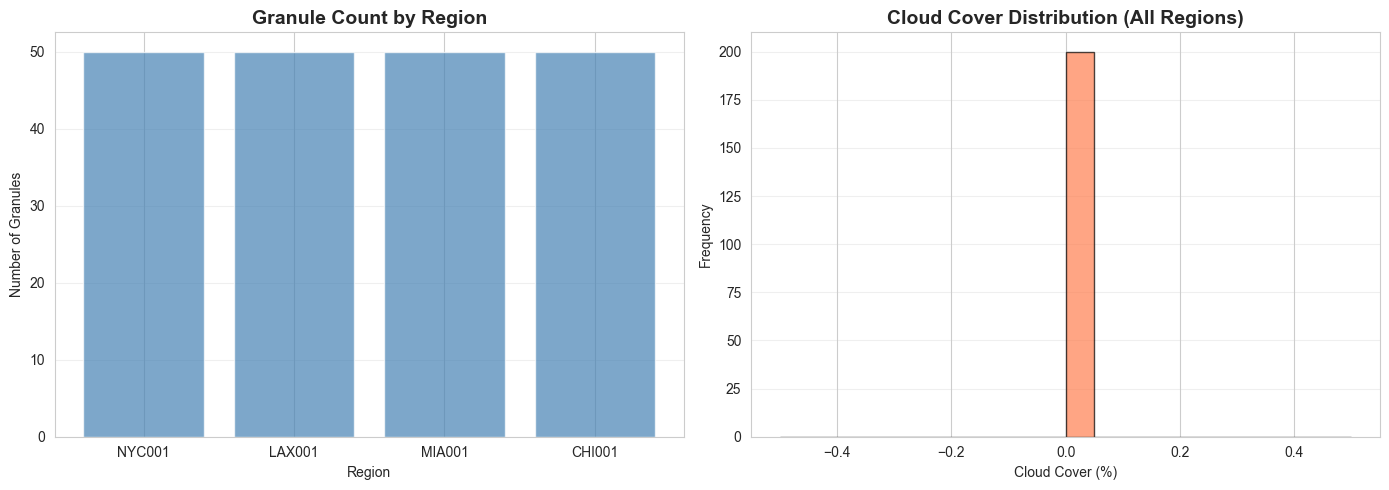

In [17]:
# Plot: Granule counts and cloud cover distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Granule counts
axes[0].bar(region_names, granule_counts, color='steelblue', alpha=0.7)
axes[0].set_title('Granule Count by Region', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Number of Granules')
axes[0].grid(axis='y', alpha=0.3)

# Cloud cover distribution
axes[1].hist(all_cloud_covers, bins=20, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_title('Cloud Cover Distribution (All Regions)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cloud Cover (%)')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
# Cloud cover statistics
avg_cloud_cover = sum(all_cloud_covers)/len(all_cloud_covers)
print(f"✓ Average cloud cover across all regions: {avg_cloud_cover:.2f}%")
print(f"✓ Min cloud cover: {min(all_cloud_covers):.2f}%")
print(f"✓ Max cloud cover: {max(all_cloud_covers):.2f}%")

✓ Average cloud cover across all regions: 0.00%
✓ Min cloud cover: 0.00%
✓ Max cloud cover: 0.00%


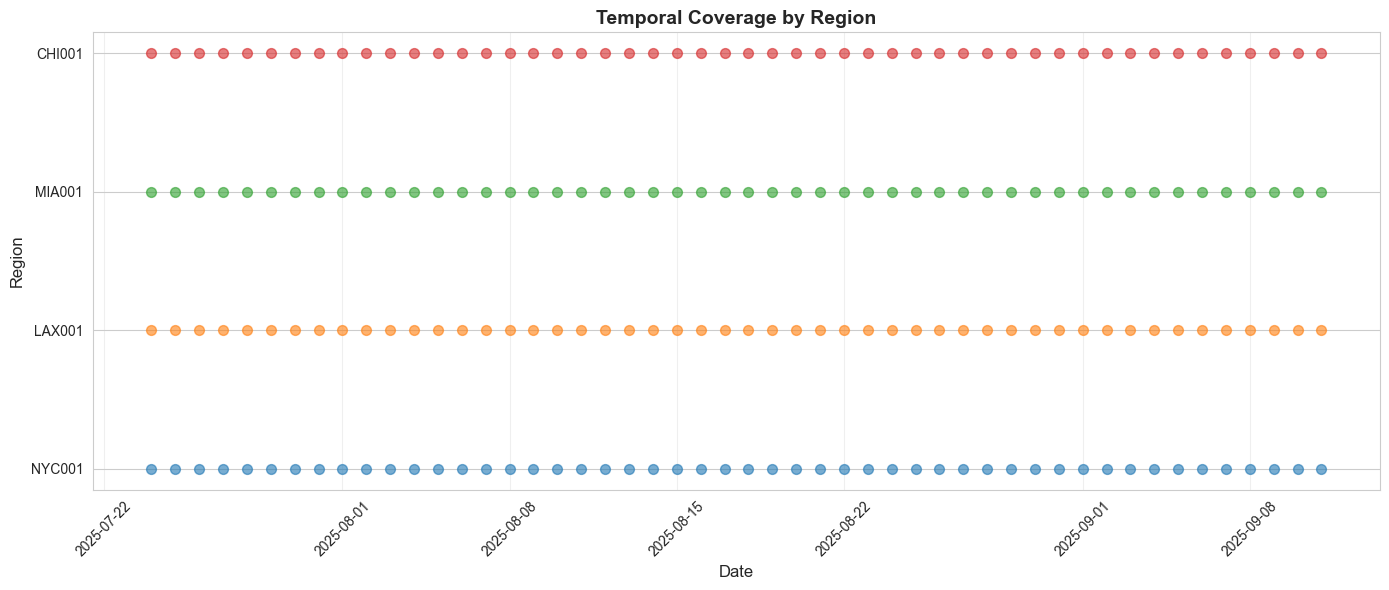

In [19]:
# Plot: Date coverage by region
fig, ax = plt.subplots(figsize=(14, 6))

for i, (region_id, df) in enumerate(granules_dict.items()):
    dates = pd.to_datetime(df['date'])
    y_pos = [i] * len(dates)
    ax.scatter(dates, y_pos, alpha=0.6, s=50, label=region_id)

ax.set_yticks(range(len(granules_dict)))
ax.set_yticklabels(list(granules_dict.keys()))
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Region', fontsize=12)
ax.set_title('Temporal Coverage by Region', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Gap Analysis: Bronze vs. Target Schema

In [20]:
# Load mock data to compare schema
mock_data_path = Path('../data/01_raw/data_samples/metrics_mock.json')

if mock_data_path.exists():
    with open(mock_data_path) as f:
        mock_data = json.load(f)
    print("✓ Mock data loaded successfully")
    print(f"  Mock has {len(mock_data['metrics'])} sample records")
else:
    print("❌ Mock data not found")
    mock_data = None

✓ Mock data loaded successfully
  Mock has 14 sample records


In [21]:
# Compare schemas
if mock_data and metrics_prep_dict:
    print("=" * 80)
    print("Schema Comparison: Bronze vs. Target API Schema")
    print("=" * 80)
    
    # Expected fields from mock
    expected_fields = set(mock_data['metrics'][0].keys())
    
    # Fields we have in metrics_prep
    sample_df = list(metrics_prep_dict.values())[0]
    bronze_fields = set(sample_df.columns)
    
    # Find gaps
    missing_fields = expected_fields - bronze_fields
    extra_fields = bronze_fields - expected_fields
    common_fields = expected_fields & bronze_fields
    
    print(f"\nExpected fields: {len(expected_fields)}")
    print(f"Bronze fields:   {len(bronze_fields)}")
    print(f"Common:          {len(common_fields)}")
    print(f"Missing:         {len(missing_fields)}")
    print(f"Extra:           {len(extra_fields)}")

Schema Comparison: Bronze vs. Target API Schema

Expected fields: 7
Bronze fields:   18
Common:          7
Missing:         0
Extra:           11


In [22]:
# Display common fields
if mock_data and metrics_prep_dict:
    print(f"✓ Common fields ({len(common_fields)}):")
    for field in sorted(common_fields):
        print(f"  ✓ {field}")

✓ Common fields (7):
  ✓ anomaly_zscore
  ✓ cdd
  ✓ date
  ✓ hdd
  ✓ heatwave_flag
  ✓ lst_mean_c
  ✓ uhi_index


In [23]:
# Display missing fields (need to calculate in silver)
if mock_data and metrics_prep_dict:
    print(f"\n⚠ Missing from Bronze ({len(missing_fields)}):")
    print("These will be calculated in the Silver Layer:\n")
    for field in sorted(missing_fields):
        print(f"  ❌ {field}")


⚠ Missing from Bronze (0):
These will be calculated in the Silver Layer:



In [24]:
# Display extra fields (metadata/tracking)
if mock_data and metrics_prep_dict:
    print(f"\n📋 Extra fields in Bronze ({len(extra_fields)}):")
    print("These are metadata/tracking fields:\n")
    for field in sorted(extra_fields):
        print(f"  + {field}")


📋 Extra fields in Bronze (11):
These are metadata/tracking fields:

  + cloud_cover
  + data_quality_flag
  + granule_id
  + lst_max_c
  + lst_min_c
  + processing_status
  + product
  + region_id
  + time_end
  + time_start
  + title


In [25]:
# Null value analysis
if mock_data and metrics_prep_dict:
    print("\n📊 Null Value Analysis (Common Fields):")
    print("-" * 80)
    for field in sorted(common_fields):
        if field in sample_df.columns:
            null_count = sample_df[field].isnull().sum()
            null_pct = (null_count / len(sample_df)) * 100
            status = "✓" if null_count == 0 else "⚠"
            print(f"  {status} {field:25s}: {null_count:3d} nulls ({null_pct:5.1f}%)")


📊 Null Value Analysis (Common Fields):
--------------------------------------------------------------------------------
  ⚠ anomaly_zscore           :  50 nulls (100.0%)
  ⚠ cdd                      :  50 nulls (100.0%)
  ✓ date                     :   0 nulls (  0.0%)
  ⚠ hdd                      :  50 nulls (100.0%)
  ✓ heatwave_flag            :   0 nulls (  0.0%)
  ⚠ lst_mean_c               :  50 nulls (100.0%)
  ⚠ uhi_index                :  50 nulls (100.0%)


## 7. Detailed Record Inspection

In [26]:
# Display a single granule record in detail
if not nyc_granules.empty:
    print("=" * 80)
    print("Detailed Inspection: Single NYC001 Granule Record")
    print("=" * 80)
    
    sample_record = nyc_granules.iloc[0]
    
    print(f"\nGranule Details:")
    for field, value in sample_record.items():
        print(f"  {field:20s}: {value}")

Detailed Inspection: Single NYC001 Granule Record

Granule Details:
  region_id           : NYC001
  granule_id          : G3623541276-LPCLOUD
  title               : MOD11A1.A2025205.h12v04.061.2025206092246
  time_start          : 2025-07-24T00:00:00.000Z
  time_end            : 2025-07-24T23:59:59.000Z
  cloud_cover         : 0
  product             : MOD11A1
  bbox_west           : -74.2589
  bbox_south          : 40.4774
  bbox_east           : -73.7004
  bbox_north          : 40.9176
  ingestion_timestamp : 2025-10-30T15:52:53.206802
  links               : []
  date                : 2025-07-24


## 8. Export Summary Report

In [27]:
# Create a summary report
report = {
    'timestamp': datetime.now().isoformat(),
    'total_regions': len(granules_dict),
    'total_granules': sum(len(df) for df in granules_dict.values()),
    'regions': []
}

for region_id, df in granules_dict.items():
    region_info = {
        'region_id': region_id,
        'granule_count': len(df),
        'date_range': {
            'start': str(df['date'].min()),
            'end': str(df['date'].max())
        },
        'unique_dates': int(df['date'].nunique()),
        'avg_cloud_cover': float(df['cloud_cover'].mean()),
        'product': str(df['product'].iloc[0]) if 'product' in df.columns else None
    }
    report['regions'].append(region_info)

print(f"✓ Report generated with {len(report['regions'])} regions")

✓ Report generated with 4 regions


In [28]:
# Display report
print("=" * 80)
print("Summary Report")
print("=" * 80)
print(json.dumps(report, indent=2))

Summary Report
{
  "timestamp": "2025-10-30T16:22:27.935680",
  "total_regions": 4,
  "total_granules": 200,
  "regions": [
    {
      "region_id": "NYC001",
      "granule_count": 50,
      "date_range": {
        "start": "2025-07-24",
        "end": "2025-09-11"
      },
      "unique_dates": 50,
      "avg_cloud_cover": 0.0,
      "product": "MOD11A1"
    },
    {
      "region_id": "LAX001",
      "granule_count": 50,
      "date_range": {
        "start": "2025-07-24",
        "end": "2025-09-11"
      },
      "unique_dates": 50,
      "avg_cloud_cover": 0.0,
      "product": "MOD11A1"
    },
    {
      "region_id": "MIA001",
      "granule_count": 50,
      "date_range": {
        "start": "2025-07-24",
        "end": "2025-09-11"
      },
      "unique_dates": 50,
      "avg_cloud_cover": 0.0,
      "product": "MOD11A1"
    },
    {
      "region_id": "CHI001",
      "granule_count": 50,
      "date_range": {
        "start": "2025-07-24",
        "end": "2025-09-11"
      }

## 9. Next Steps: Silver Layer Requirements

Based on this exploration, the Silver Layer needs to:

1. **Download Raster Data**: Use the granule links to download HDF/GeoTIFF files from NASA
2. **Extract LST Values**: Use GDAL/rasterio to extract pixel values for each region's bbox
3. **Calculate Metrics**:
   - `lst_mean_c`: Mean LST in Celsius (convert from Kelvin)
   - `cdd`: Cooling Degree Days = max(0, LST - 18°C)
   - `hdd`: Heating Degree Days = max(0, 18°C - LST)
   - `uhi_index`: Urban Heat Island index (vs rural baseline)
   - `anomaly_zscore`: Z-score vs historical average
   - `heatwave_flag`: Boolean for consecutive hot days

4. **Match API Schema**: Transform to exact structure in `metrics_mock.json`
5. **Store in Primary Layer**: Save to `data/03_primary/metrics_by_region/`

## Conclusion

✅ **Bronze layer successfully created and validated**

- 4 regions with 50 granules each
- Data quality tracking in place
- Metadata captured correctly
- Ready for Silver layer processing

**Bronze = Intermediate Layer Complete!**